In [2]:
%matplotlib inline

from scipy.interpolate import interp1d
import matplotlib.pyplot as plt
from astropy.table import Table
import astropy.io.fits as fits
import numpy as np
from tqdm import *

In [4]:
qtb = Table.read('tables/Zheng18_Table1.fits', format='fits')
len(qtb[qtb['Glat']>0]), len(qtb[qtb['Glat']<0])

(63, 69)

This is to figure out the min/max/mean/std of the sightlines with and without the Fermi Bubble sightlines 

In [5]:
## find those sightlines that are overlap with Fermi Bubble 
#fbn = ['PDS456', 'QSO-B1617+1731', 'LBQS-1435-0134', '1ES1553+113', '1ES1553+113', 
#       'PG1435-067', 'Q1545+210', 'MRK841', 'SDSSJ141542.90+163413.8', 'NGC-5548', 'PG1352+183']
#fbs = ['MARK509', 'ESO-141-55', 'RBS1666', 'PKS2005-489']

#fb_ind = np.zeros(len(qtb), dtype=bool)
#for iq, iqtb in enumerate(qtb):
#    if iqtb['ID'] in fbn+fbs:
#        fb_ind[iq] = True

In [7]:
# qtb = Table.read('tables/SiIV_measurement_newSNR_linear_100918.txt', format='ascii')
wtfb = qtb[qtb['Q']==0.0]   # with Fermi Bubble sightlines, but no saturation 
N1 = wtfb['N_1393'] 
N2 = wtfb['N_1402']
eN1 = wtfb['Nsig_1393']
eN2 = wtfb['Nsig_1402']

Ncom = (N1+N2)/2
eNcom = np.sqrt(eN1**2 + eN2**2)/2

print('SiIV: %.2e %.2e'%(np.mean(Ncom), np.std(Ncom)))
print('log:  %.2f %.2f'%(np.log10(np.mean(Ncom)), np.std(Ncom)/np.mean(Ncom)/np.log(10)))

SiIV: 3.76e+13 1.41e+13
log:  13.58 0.16


### Now plot the sightlines using the measurements 

In [9]:
# resolved sightlines 
qtb_Q0 = qtb[qtb['Q']==0]

N_Q0 = (qtb_Q0['N_1393']+qtb_Q0['N_1402'])/2.
logN_Q0 = np.log10(N_Q0)
Ne_Q0 = np.sqrt(qtb_Q0['Nsig_1393']**2 + qtb_Q0['Nsig_1402']**2)/2
logNe_Q0 = Ne_Q0/N_Q0/np.log(10)

V_Q0 = (qtb_Q0['V_1393']+qtb_Q0['V_1402'])/2.
Ve_Q0 = np.sqrt(qtb_Q0['Vsig_1393']**2 + qtb_Q0['Vsig_1402']**2)/2

# saturate sightlines
qtb_Q1 = qtb[qtb['Q']==1]

N_Q1 = qtb_Q1['N_1402']
logN_Q1 = np.log10(N_Q1)

V_Q1 = (qtb_Q1['V_1393']+qtb_Q1['V_1402'])/2.
Ve_Q1 = np.sqrt(qtb_Q1['Vsig_1393']**2 + qtb_Q1['Vsig_1402']**2)/2

In [10]:
#hvcqso = ['B0117-2837', 'B0120-28', 'ESO292-G24', 'FAIRALL9', 'HE0056-3622',
#          'HS1831+5338', 'MRK304', 'PG1112+431', 'PKS1136-13', 'RBS1892',
#          'RXJ2139.7+0246', 'RXSJ09565-0452', 'TON1187', 'TONS210']

plot the measurements of SiIV column density 

In [11]:
def aitoff_fake_lb(l, b):
    # l and b should have unit of degree
    import astropy.coordinates as coord
    import astropy.units as u
    mock_ql = coord.Angle(l)
    mock_ql = mock_ql.wrap_at(180*u.degree)
    mock_qb = coord.Angle(b)

    new_ql = mock_ql.copy()
    ind1 = new_ql >= 0
    ind2 = new_ql<0

    new_ql[ind1] = 180*u.degree-new_ql[ind1]
    new_ql[ind2] = -180*u.degree-new_ql[ind2]
    return new_ql, mock_qb

def aitoff_lb(l, b):
    # l and b should have unit of degree
    import astropy.coordinates as coord
    import astropy.units as u
    mock_ql = coord.Angle(l)
    mock_ql = mock_ql.wrap_at(180*u.degree)
    mock_qb = coord.Angle(b)
    return mock_ql, mock_qb

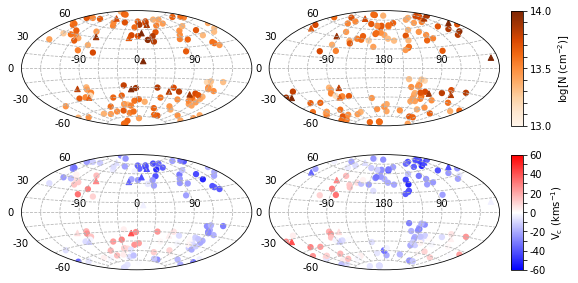

In [12]:
fig = plt.figure(figsize=(8, 4))
ax_tl = fig.add_axes([0.05, 0.55, 0.4, 0.4], projection='aitoff')
ax_tr = fig.add_axes([0.48, 0.55, 0.4, 0.4], projection='aitoff')
ax_bl = fig.add_axes([0.05, 0.05, 0.4, 0.4], projection='aitoff')
ax_br = fig.add_axes([0.48, 0.05, 0.4, 0.4], projection='aitoff')
    
N_map = plt.cm.Oranges
V_map = plt.cm.bwr

#### the allsky distribution, center at 0 
ll, bb = aitoff_lb(qtb_Q0['Glon'], qtb_Q0['Glat'])
ima = ax_tl.scatter(ll.rad, bb.rad, c=logN_Q0, vmin=13, vmax=14, cmap=N_map, s=40, edgecolor='none')
ll, bb = aitoff_lb(qtb_Q1['Glon'], qtb_Q1['Glat'])
ax_tl.scatter(ll.rad, bb.rad, c=logN_Q1, vmin=13, vmax=14, cmap=N_map, s=30, marker='^')


### velocity, top right 
ll, bb = aitoff_lb(qtb_Q0['Glon'], qtb_Q0['Glat'])
imb = ax_bl.scatter(ll.rad, bb.rad, c=V_Q0, vmin=-60, vmax=60, cmap=V_map, s=40, edgecolor='none')
ll, bb = aitoff_lb(qtb_Q1['Glon'], qtb_Q1['Glat'])
ax_bl.scatter(ll.rad, bb.rad, c=V_Q1, vmin=-60, vmax=60, cmap=V_map, s=30, marker='^')

# center at 180 
ll, bb = aitoff_fake_lb(qtb_Q0['Glon'], qtb_Q0['Glat'])
ax_tr.scatter(ll.rad, bb.rad, c=logN_Q0, vmin=13, vmax=14, cmap=N_map, s=40, edgecolor='none')
ll, bb = aitoff_fake_lb(qtb_Q1['Glon'], qtb_Q1['Glat'])
ax_tr.scatter(ll.rad, bb.rad, c=logN_Q1, vmin=13, vmax=14, cmap=N_map, s=30, marker='^')

### velocity, bottom right 
ll, bb = aitoff_fake_lb(qtb_Q0['Glon'], qtb_Q0['Glat'])
ax_br.scatter(ll.rad, bb.rad, c=V_Q0, vmin=-60, vmax=60, cmap=V_map, s=40, edgecolor='none')
ll, bb = aitoff_fake_lb(qtb_Q1['Glon'], qtb_Q1['Glat'])
ax_br.scatter(ll.rad, bb.rad, c=V_Q1, vmin=-60, vmax=60, cmap=V_map, s=30, marker='^')


for ax in [ax_tl, ax_bl]:
    ax.grid(linestyle='--', color=plt.cm.Greys(0.4))
    ax.set_xticks(np.radians(np.mgrid[-150:180:30]))
    ax.set_xticklabels(['', '', '-90', '', '', '0', '', '', '90', '', ''])
    ax.set_yticks(np.radians(np.mgrid[-75:90:15]))
    ax.set_yticklabels(['', '-60', '', '-30', '', '0', '', '30', '', '60', ''])
    
for ax in [ax_tr, ax_br]:
    ax.grid(linestyle='--', color=plt.cm.Greys(0.4))
    ax.set_xticks(np.radians(np.mgrid[-150:180:30]))
    ax.set_xticklabels(['', '', '-90', '', '', '180', '', '', '90', '', ''])
    ax.set_yticks(np.radians(np.mgrid[-75:90:15]))
    ax.set_yticklabels(['', '-60', '', '-30', '', '0', '', '30', '', '60', ''])
    

cax1 = fig.add_axes([0.9, 0.55, 0.02, 0.4])
#fax1 = fig.add_axes([0.98, 0.95, 0.02, 0.02])
#ima = fax1.imshow(np.zeros((4, 4))+np.nan, norm=N_norm, cmap=N_map)
#fax1.axis('off')
cb1 = fig.colorbar(ima, cax=cax1)
cb1.set_ticks(np.mgrid[13:14.1:0.1])
cb1.set_ticklabels(['13.0', '', '', '', '', '13.5', '', '','', '', '14.0'])
cb1.set_label(r'${\rm log[N\ (cm^{-2})]}$')

cax2 = fig.add_axes([0.9, 0.05, 0.02, 0.4])
#fax2 = fig.add_axes([0.98, 0.5, 0.02, 0.02])
#imb = fax2.imshow(np.zeros((4, 4))+np.nan, norm=V_norm, cmap=V_map)
#fax2.axis('off')
cb2 = fig.colorbar(imb, cax=cax2)
cb2.set_ticks(np.mgrid[-60:61:10])
cb2.set_ticklabels(['-60', '', '-40', '', '-20', '', '0', '','20', '', '40', '', '60'])
cb2.set_label(r'${\rm V_c\ (km s^{-1})}$')
fig.savefig('figs/fig4.pdf')

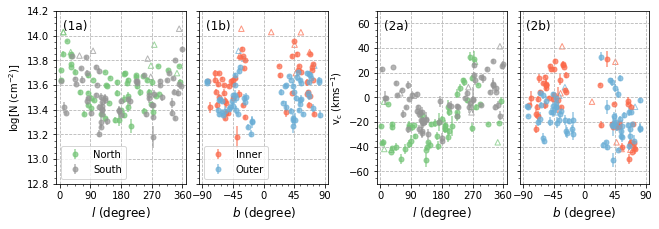

In [13]:
fig = plt.figure(figsize=(9, 3))
ax1a = fig.add_axes([0.075, 0.17, 0.2, 0.8])
ax1b = fig.add_axes([0.295, 0.17, 0.2, 0.8])
ax2a = fig.add_axes([0.57, 0.17, 0.2, 0.8])
ax2b = fig.add_axes([0.79, 0.17, 0.2, 0.8])

cg = plt.cm.Reds(0.5)
ck = plt.cm.Blues(0.5)
cr = plt.cm.Greens(0.5)
cb = plt.cm.Greys(0.5)

#### longitude dependence 
north = qtb_Q0['Glat']>=0
south = qtb_Q0['Glat']<0
x1, y1, ye1 = qtb_Q0['Glon'], logN_Q0, logNe_Q0
ax1a.errorbar(x1[north], y1[north], yerr=ye1[north], markersize=5, marker='o', 
              linestyle='none', color=cr, alpha=0.7, label='North')
ax1a.errorbar(x1[south], y1[south], yerr=ye1[south], markersize=5, marker='o', 
              linestyle='none', color=cb, alpha=0.7, label='South')

north = qtb_Q1['Glat']>=0
south = qtb_Q1['Glat']<0
x1, y1 = qtb_Q1['Glon'], logN_Q1
ax1a.scatter(x1[north], y1[north], s=30, marker='^', facecolor='none', edgecolor=cr, alpha=0.7, label=None)
ax1a.scatter(x1[south], y1[south], s=30, marker='^', facecolor='none', edgecolor=cb, alpha=0.7, label=None)
ax1a.set_ylabel(r'log[N (cm$^{-2}$)]')
ax1a.set_xlim(-10, 370)
ax1a.set_xlabel(r'$l$ (degree)', fontsize=12)
ax1a.set_xticks(np.mgrid[0:361:90])

#### latitude dependence
inn = np.any([qtb_Q0['Glon']>270, qtb_Q0['Glon']<90], axis=0)
out = np.all([qtb_Q0['Glon']>=90, qtb_Q0['Glon']<=270], axis=0)
x2, y2, ye2 = qtb_Q0['Glat'], logN_Q0, logNe_Q0
ax1b.errorbar(x2[inn], y2[inn], yerr=ye2[inn], markersize=5, marker='o', linestyle='none', 
              color=cg, alpha=0.7, label='Inner')
ax1b.errorbar(x2[out], y2[out], yerr=ye2[out], markersize=5, marker='o', linestyle='none', 
              color=ck, alpha=0.7, label='Outer')

inn = np.any([qtb_Q1['Glon']>270, qtb_Q1['Glon']<90], axis=0)
out = np.all([qtb_Q1['Glon']>=90, qtb_Q1['Glon']<=270], axis=0)
x2, y2 = qtb_Q1['Glat'], logN_Q1
ax1b.scatter(x2[inn], y2[inn], s=30, marker='^', edgecolor=cg, facecolor='none', alpha=0.7, label=None)
ax1b.scatter(x2[out], y2[out], s=30, marker='^', edgecolor=ck, facecolor='none', alpha=0.7, label=None)

ax1b.set_xlim(-95, 95)
ax1b.set_xlabel(r'$b$ (degree)', fontsize=12)
ax1b.set_xticks([-90, -45, 0, 45, 90])
ax1b.set_yticklabels([])

for ax in [ax1a, ax1b]:
    ax.set_ylim(12.8, 14.2)
    ax.legend(loc='lower left', fontsize=10)
    ax.minorticks_on()
    ax.grid(linestyle='--', color=plt.cm.Greys(0.4))
    
    
############### ########## velocity ############ 
#### longitude dependence 
north = qtb_Q0['Glat']>=0
south = qtb_Q0['Glat']<0
x1, y1, ye1 = qtb_Q0['Glon'], V_Q0, Ve_Q0
ax2a.errorbar(x1[north], y1[north], yerr=ye1[north], markersize=5, marker='o', 
              linestyle='none', color=cr, alpha=0.7, label=None)
ax2a.errorbar(x1[south], y1[south], yerr=ye1[south], markersize=5, marker='o', 
              linestyle='none', color=cb, alpha=0.7, label=None)

north = qtb_Q1['Glat']>=0
south = qtb_Q1['Glat']<0
x1, y1 = qtb_Q1['Glon'], V_Q1
ax2a.scatter(x1[north], y1[north], s=30, marker='^', facecolor='none', edgecolor=cr, alpha=0.7, label=None)
ax2a.scatter(x1[south], y1[south], s=30, marker='^', facecolor='none', edgecolor=cb, alpha=0.7, label=None)
ax2a.set_ylabel(r'${\rm v_c\ (km s^{-1})}$ ')
ax2a.set_xlim(-10, 370)
ax2a.set_xlabel(r'$l$ (degree)', fontsize=12)
ax2a.set_xticks(np.mgrid[0:361:90])

#### latitude dependence
inn = np.any([qtb_Q0['Glon']>270, qtb_Q0['Glon']<90], axis=0)
out = np.all([qtb_Q0['Glon']>=90, qtb_Q0['Glon']<=270], axis=0)
x2, y2, ye2 = qtb_Q0['Glat'], V_Q0, Ve_Q0
ax2b.errorbar(x2[inn], y2[inn], yerr=ye2[inn], markersize=5, marker='o', 
              linestyle='none', color=cg, alpha=0.7, label=None)
ax2b.errorbar(x2[out], y2[out], yerr=ye2[out], markersize=5, marker='o', 
              linestyle='none', color=ck, alpha=0.7, label=None)

inn = np.any([qtb_Q1['Glon']>270, qtb_Q1['Glon']<90], axis=0)
out = np.all([qtb_Q1['Glon']>=90, qtb_Q1['Glon']<=270], axis=0)
x2, y2 = qtb_Q1['Glat'], V_Q1
ax2b.scatter(x2[inn], y2[inn], s=30, marker='^', edgecolor=cg, facecolor='none', alpha=0.7, label=None)
ax2b.scatter(x2[out], y2[out], s=30, marker='^', edgecolor=ck, facecolor='none', alpha=0.7, label=None)

ax2b.set_xlim(-95, 95)
ax2b.set_xlabel(r'$b$ (degree)', fontsize=12)
ax2b.set_xticks([-90, -45, 0, 45, 90])
ax2b.set_yticklabels([])

for ax in [ax2a, ax2b]:
    ax.set_ylim(-70, 70)
    ax.minorticks_on()
    ax.grid(linestyle='--', color=plt.cm.Greys(0.4))
    
ax1a.text(10, 14.05, '(1a)', fontsize=12)
ax1b.text(-85, 14.05, '(1b)', fontsize=12)
ax2a.text(10, 55, '(2a)', fontsize=12)
ax2b.text(-85, 55, '(2b)', fontsize=12)
    
fig.savefig('figs/fig5.pdf')